<a href="https://colab.research.google.com/github/Aida-Aliyyah/Tugas-2-Mechine-Learning/blob/main/Tugas_2_Mechine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
import os
from google.colab import files

# Pastikan file kaggle.json sudah diunggah
if not os.path.exists("/root/.kaggle/kaggle.json"):
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    # Pindahkan file kaggle.json ke direktori yang tepat
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [4]:
!kaggle datasets download -d brmil07/bank-stock-price

  0% 0.00/41.8k [00:00<?, ?B/s]
100% 41.8k/41.8k [00:00<00:00, 25.1MB/s]


In [5]:
import pandas as pd

In [6]:
!unzip /content/bank-stock-price.zip

Archive:  /content/bank-stock-price.zip
  inflating: Bank_Stock_Price_10Y.csv  


In [7]:
dataset = pd.read_csv('/content/Bank_Stock_Price_10Y.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500
...,...,...,...,...,...,...,...
2478,2024-01-24,9600.0,9600.0,9475.0,9525.0,9525.000000,84906000
2479,2024-01-25,9450.0,9575.0,9450.0,9500.0,9500.000000,63212700
2480,2024-01-26,9400.0,9450.0,9300.0,9350.0,9350.000000,78977300
2481,2024-01-29,9400.0,9550.0,9375.0,9550.0,9550.000000,73452800


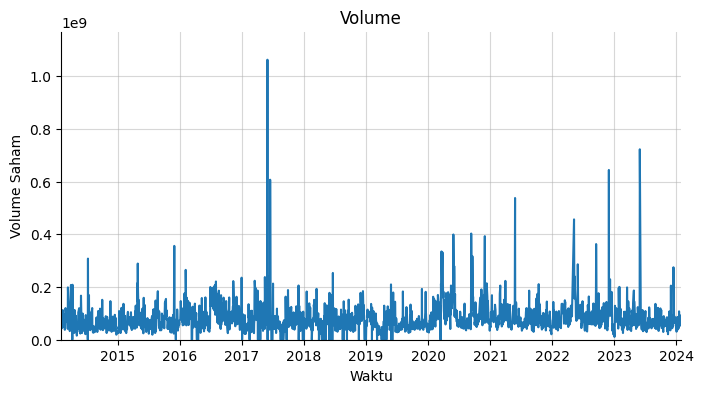

In [8]:
from matplotlib import pyplot as plt
import pandas as pd

# Mengatur format tanggal
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Membuat plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dataset['Date'], dataset['Volume'], label='Volume')
ax.set_title('Volume')

# Mengatur label sumbu
plt.xlabel('Waktu')
plt.ylabel('Volume Saham')

# Menambahkan grid
plt.grid(True, which='both', alpha=0.5)

# Mengatur batas sumbu X dan Y
# Ubah nilai minimum dan maksimum sesuai kebutuhan
plt.xlim(xmin=dataset['Date'].min(), xmax=dataset['Date'].max())
plt.ylim(ymin=0, ymax=dataset['Volume'].max() * 1.1)

# Menghilangkan garis atas dan kanan
plt.gca().spines[['top', 'right']].set_visible(False)

# Menampilkan plot
plt.show()

grafik diatas menggambarkan banyaknya volume saham dalam rentan watu 2014-2016,  pada grafik ini fokus menggambarkan hubungan antara  volume saham dan waktu, berdasarkan grafik tersebut dapat dilihat bahwa terdapat peningkatan volume saham yang sangat signifikan diantara tahun 2017-2018. Grafik ini juga menunjukkan kecenderungan volume saham yang stabil dari tahun ke tahun bahkan mengalami kenaikan di beberapa waktu tertentu.

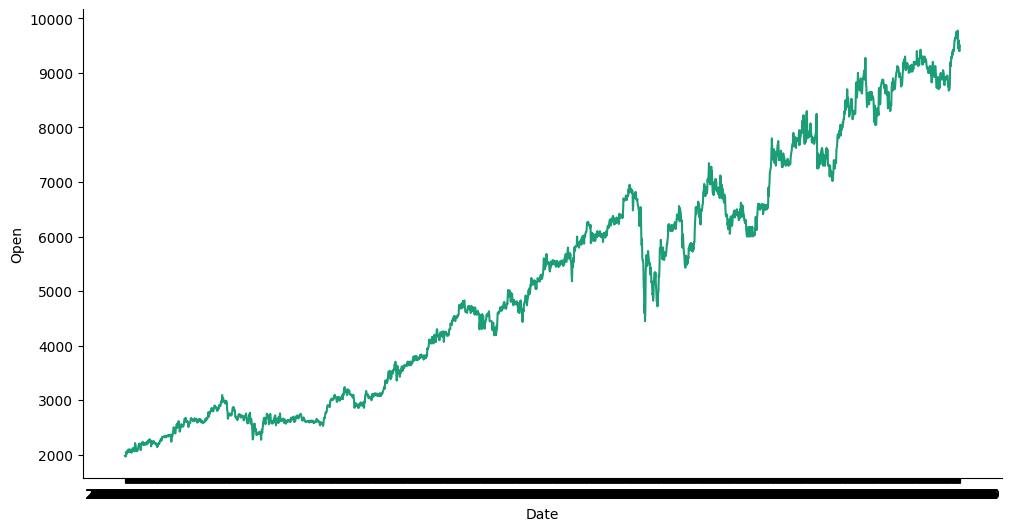

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

**Grafik Runtun Waktu**

berbeda dengan grafik sebelumnya grafik time series (runtun waktu) visualisasikan data yang menunjukkan perubahan nilai suatu variabel dalam periode waktu tertentu. Grafik ini sering digunakan untuk melacak tren, mengidentifikasi pola, dan membuat prediksi. Berdasarkan Grafik time series diatas dapat dilihat bahwa data tersebut menunjukkan tren naik dalam waktu ke waktu, hal ini dapat menjadi alasan investor dalam melakukan akuisisi saham.